<style>
    h1 {font-family:Times; font-size:20pt; font-weight:Bold}
    h2 {font-family:Times; font-size:18pt; font-weight:Bold}
    h3 {font-family:Times; font-size:16pt; font-weight:Bold}
    h4 {font-family:Times; font-size:14pt; font-weight:Bold}
    p {font-family:Times; font-size:12pt}
</style>
> #### Total attenuation for GEO Satellite
> <u> PART 1 :: Total Attenuation :</u> Plot the statistics for each year separately and all years together

                       original_rain_att_timeseries_freq-39.402+others  \
ALPHASAT TOTAL                                                522720.0   
ALPHASAT VALID                                                522720.0   
ALPHASAT AVAILABILITY                                              1.0   

                       synthetic_rain_att_NC_timeseries_freq-39.402+others  
ALPHASAT TOTAL                                                  522720.0    
ALPHASAT VALID                                                  522720.0    
ALPHASAT AVAILABILITY                                                1.0    
                       original_rain_att_timeseries_freq-39.402+others  \
ALPHASAT TOTAL                                                524160.0   
ALPHASAT VALID                                                524160.0   
ALPHASAT AVAILABILITY                                              1.0   

                       synthetic_rain_att_NC_timeseries_freq-39.402+others  
ALPHASAT TOTAL       

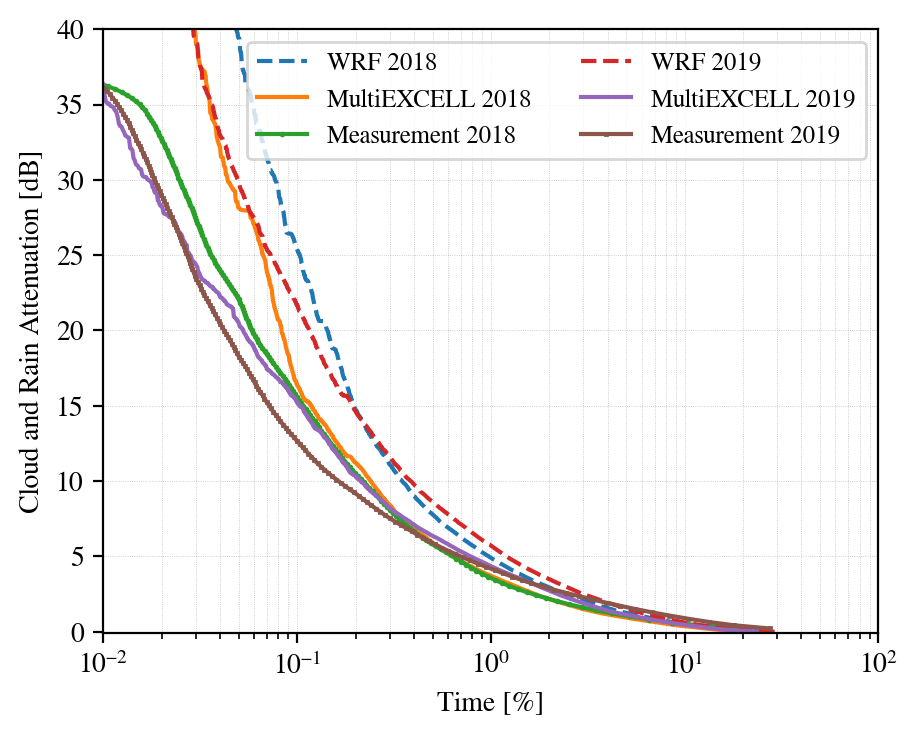

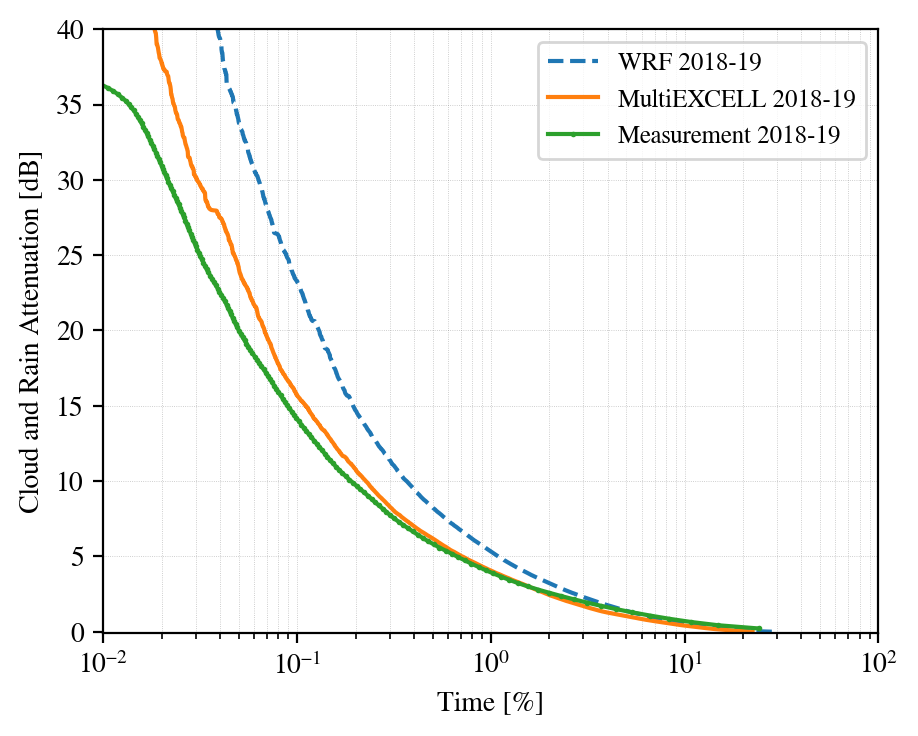

In [2]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from scipy.interpolate import interp1d

from utils import plot_statistic, statistic, statistic_old, field_contribution


matplotlib.rcParams.update({
    'font.family': 'FreeSerif',
    'font.size': 10,
    })

directory = "TIMESERIES-WRF"


DATE_START = ["2018-09-01 00:00:00","2019-09-01 00:00:00"]
DATE_STOP = ["2019-08-30 00:00:00", "2020-08-30 00:00:00"]
station_name = 'LLN'
PERIOD = 12
FREQ = 39.402 #39.402, 19.0
TAU = 45.0 #45.0, 0
TS = 60   # seconds

SATELLITE = "ALPHASAT"
XLABEL = 'Time [%]'
VERSION = 'new'  # 'old'


RAIN_WRF = True 
RAIN_MULTIEXCELL = True
CLOUD = True
GAS_OX = False
GAS_WV = False  
SCINTILLATION = False
CONTRIBUTION = True

CONTINUOUS = False


if FREQ==39.402:
	ch=2
else:
	ch=4

EXPERIMENT_FILE = ['STATISTICS-MEASUREMENT/ch{}/2018_09_01_to_2019_08_30.h5'.format(ch),
                   'STATISTICS-MEASUREMENT/ch{}/2019_09_01_to_2020_08_30.h5'.format(ch),]


style = ["--","-","-."] # wrf, multiexcel, mie
fig, ax = plt.subplots(dpi=200, figsize=(5, 4))


#---------------------------------------------------
#       For each year separately
#---------------------------------------------------
stl_exp = '-o'
for start, stop, exp_file in zip(DATE_START, DATE_STOP, EXPERIMENT_FILE):
    dates = pd.period_range(start=start, end=stop, freq='{}H'.format(PERIOD))

    file_names = []
    for date in dates[:-1]:
        fname = os.path.join(directory, '{}.h5'.format(date.strftime("%Y/%m/%d/%H:%M")))
        file_names = np.append(file_names, fname)

    _, ax, availablility = plot_statistic(file_names, FREQ, SATELLITE, Ts=TS, ax=ax,
            rain_multiexcell=RAIN_MULTIEXCELL, rain_wrf=RAIN_WRF, 
            gas_ox=GAS_OX, gas_wv=GAS_WV, cloud=CLOUD, 
            scintillation=SCINTILLATION, contribution=CONTRIBUTION, continuous=CONTINUOUS, 
            ylabel=None, xlabel=None, xlim=None, ylim=None , style=style,
            version=VERSION, ignore_index=True, availability_scale=True, fig_name=None)
	
    print(availablility)
	
    stats_exp = pd.read_hdf(exp_file, key='alphasat', mode='r')

    ax = stats_exp.plot(ax=ax, x = 'CCDF', y = 'ATTENUATION', style=stl_exp, markersize=1)
    stl_exp = '-s'


ax.legend(['WRF 2018', 'MultiEXCELL 2018','Measurement 2018',
        'WRF 2019', 'MultiEXCELL 2019', 'Measurement 2019'], ncol = 2, fontsize=9)


ax.set_xlabel(XLABEL)
ax.set_ylabel("Cloud and Rain Attenuation [dB]")
ax.set_xlim([0.01,100])
ax.set_ylim([-0.1,40])

ax.grid(which='both', linestyle=':', color='gray',
            linewidth=0.3, alpha=0.5)

fig.savefig('FIGURES/Total-ccdf-{}-sub1.png'.format(np.int32(FREQ)), dpi=300,bbox_inches="tight", backend='AGG')

#--------------------------------------------------

fig, ax = plt.subplots(dpi=200, figsize=(5, 4))
#---------------------------------------------------
#       All years together
#---------------------------------------------------

EXPERIMENT_FILE = 'STATISTICS-MEASUREMENT/ch{}/2018_09_01_to_2020_08_30.h5'.format(ch)


file_names = []
for start, stop in zip(DATE_START, DATE_STOP):
    dates = pd.period_range(start=start, end=stop, freq='{}H'.format(PERIOD))

    for date in dates[:-1]:
        fname = os.path.join(directory, '{}.h5'.format(date.strftime("%Y/%m/%d/%H:%M")))
        file_names = np.append(file_names, fname)

_, ax, availablility = plot_statistic(file_names, FREQ, SATELLITE, Ts=TS, ax=ax,
        rain_multiexcell=RAIN_MULTIEXCELL, rain_wrf=RAIN_WRF, 
        gas_ox=GAS_OX, gas_wv=GAS_WV, cloud=CLOUD, 
        scintillation=SCINTILLATION, contribution=CONTRIBUTION, continuous=CONTINUOUS, 
        ylabel=None, xlabel=None, xlim=None, ylim=None , style=style,
        version=VERSION, ignore_index=True, availability_scale=True, fig_name=None)


print(availablility)

stats_exp = pd.read_hdf(EXPERIMENT_FILE, key='alphasat', mode='r')

ax = stats_exp.plot(ax=ax, x = 'CCDF', y = 'ATTENUATION', style='-o', markersize=1)



ax.legend(['WRF 2018-19', 'MultiEXCELL 2018-19', 'Measurement 2018-19'], ncol = 1, fontsize=9)


ax.set_xlabel(XLABEL)
ax.set_ylabel("Cloud and Rain Attenuation [dB]")
ax.set_xlim([0.01,100])
ax.set_ylim([-0.1,40])

ax.grid(which='both', linestyle=':', color='gray',
            linewidth=0.3, alpha=0.5)

fig.savefig('FIGURES/Total-ccdf-{}-sub2.png'.format(np.int32(FREQ)), dpi=300,bbox_inches="tight", backend='AGG')


<style>
    h1 {font-family:Times; font-size:20pt; font-weight:Bold}
    h2 {font-family:Times; font-size:18pt; font-weight:Bold}
    h3 {font-family:Times; font-size:16pt; font-weight:Bold}
    h4 {font-family:Times; font-size:14pt; font-weight:Bold}
    p {font-family:Times; font-size:12pt}
</style>

> <u> PART 2 :: TOTAL ERROR ANALYSYS </u> : Measure the error analysis in statistical

In [4]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from scipy.interpolate import interp1d

from utils import error_statistics


matplotlib.rcParams.update({
    'font.family': 'FreeSerif',
    'font.size': 10,
    })

directory = "TIMESERIES-WRF"
    
DATE_START = ["2018-09-01 00:00:00","2019-09-01 00:00:00"]
DATE_STOP = ["2019-08-30 00:00:00", "2020-08-30 00:00:00"]
station_name = 'LLN'
PERIOD = 12
FREQ = 39.402#39.402, 19.0
TAU = 45.0 #45.0, 0
TS = 60 

SATELLITE = "ALPHASAT"
XLABEL = 'Time [%]'
VERSION = 'new'  # 'old'


RAIN_WRF = True 
RAIN_MULTIEXCELL = True
CLOUD = True
GAS_OX = False
GAS_WV = False  
SCINTILLATION = False
CONTRIBUTION = True

CONTINUOUS = False

if FREQ==39.402:
	ch=2
else:
	ch=4

EXPERIMENT_FILE = ['STATISTICS-MEASUREMENT/ch{}/2018_09_01_to_2019_08_30.h5'.format(ch),
                   'STATISTICS-MEASUREMENT/ch{}/2019_09_01_to_2020_08_30.h5'.format(ch),]
#---------------------------------------------------
#       Import ITU-R P.618
#---------------------------------------------------
Pr = np.array([0.3, 0.5, 1])/10
        
P_REF = Pr
MODE = 3
#---------------------------------------------------
#       For each year separately
#---------------------------------------------------
mu = []
sig = []
rho = []
for start, stop, exp_file in zip(DATE_START, DATE_STOP, EXPERIMENT_FILE):
    dates = pd.period_range(start=start, end=stop, freq='{}H'.format(PERIOD))

    file_names = []
    for date in dates[:-1]:
        fname = os.path.join(directory, '{}.h5'.format(date.strftime("%Y/%m/%d/%H:%M")))
        file_names = np.append(file_names, fname)

    stats_exp = pd.read_hdf(exp_file, key='alphasat', mode='r')

    fcn =  interp1d(stats_exp['CCDF'].to_numpy(),stats_exp['ATTENUATION'].to_numpy(), kind='linear', bounds_error=True)

    A_REF = fcn(P_REF)

    _mu, _sig, _rho, _field= error_statistics(file_names, P_REF, A_REF, MODE, FREQ, SATELLITE, Ts=TS, 
        rain_multiexcell=RAIN_MULTIEXCELL, rain_wrf=RAIN_WRF,
        gas_ox=GAS_OX, gas_wv=GAS_WV, cloud=CLOUD, 
        scintillation=SCINTILLATION, contribution=CONTRIBUTION, continuous=CONTINUOUS,
        version=VERSION, ignore_index=True, availability_scale=False)

    mu = np.append(mu, _mu)
    sig = np.append(sig, _sig)
    rho = np.append(rho, _rho)


#---------------------------------------------------
#       All years together
#---------------------------------------------------
EXPERIMENT_FILE = 'STATISTICS-MEASUREMENT/ch{}/2018_09_01_to_2020_08_30.h5'.format(ch)

stats_exp = pd.read_hdf(EXPERIMENT_FILE, key='alphasat', mode='r')

fcn =  interp1d(stats_exp['CCDF'].to_numpy(),stats_exp['ATTENUATION'].to_numpy(), kind='linear', bounds_error=True)

A_REF = fcn(P_REF)

file_names = []
for start, stop in zip(DATE_START, DATE_STOP):
    dates = pd.period_range(start=start, end=stop, freq='{}H'.format(PERIOD))

    for date in dates[:-1]:
        fname = os.path.join(directory, '{}.h5'.format(date.strftime("%Y/%m/%d/%H:%M")))
        file_names = np.append(file_names, fname)

_mu, _sig, _rho, _field= error_statistics(file_names, P_REF, A_REF, MODE, FREQ, SATELLITE, Ts=TS, 
        rain_multiexcell=RAIN_MULTIEXCELL, rain_wrf=RAIN_WRF,
        gas_ox=GAS_OX, gas_wv=GAS_WV, cloud=CLOUD, 
        scintillation=SCINTILLATION, contribution=CONTRIBUTION, continuous=CONTINUOUS,
        version=VERSION, ignore_index=True, availability_scale=False)

mu = np.append(mu, _mu)
sig = np.append(sig, _sig)
rho = np.append(rho, _rho)


print('WRF 2018', 'MultiEXCELL 2018',
      'WRF 2019', 'MultiEXCELL 2019', 
      'WRF 2018-19', 'MultiEXCELL 2018-19')
print(np.round(mu*100, decimals=2))
print(np.round(sig*100, decimals=2))
print(np.round(rho*100, decimals=2))


WRF 2018 MultiEXCELL 2018 WRF 2019 MultiEXCELL 2019 WRF 2018-19 MultiEXCELL 2018-19
[59.57 21.7  51.2  11.09 54.63 15.2 ]
[ 9.44 12.62  2.06  6.01  4.93  3.41]
[60.32 25.1  51.24 12.62 54.85 15.58]
